In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")


In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic_cleaned.csv to titanic_cleaned.csv


In [4]:
df = pd.read_csv("titanic_cleaned.csv")
df.head()

,Survived,Passenger_class,Sex,Age,Sib/Spouses,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Passenger_class  891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              891 non-null    float64
 4   Sib/Spouses      891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Embarked         891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


,0
Survived,2
Passenger_class,3
Sex,2
Age,88
Sib/Spouses,7
Parch,7
Fare,248
Embarked,3


<Axes: title={'center': 'Gender Distribution'}, xlabel='Sex'>

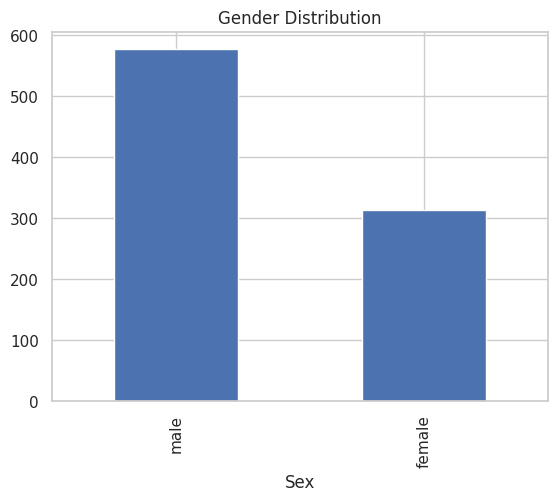

In [6]:
df['Sex'].value_counts().plot(kind='bar', title='Gender Distribution')

There are more male passengers than female passengers on the Titanic. so, this tells us that men made up the majority of travelers

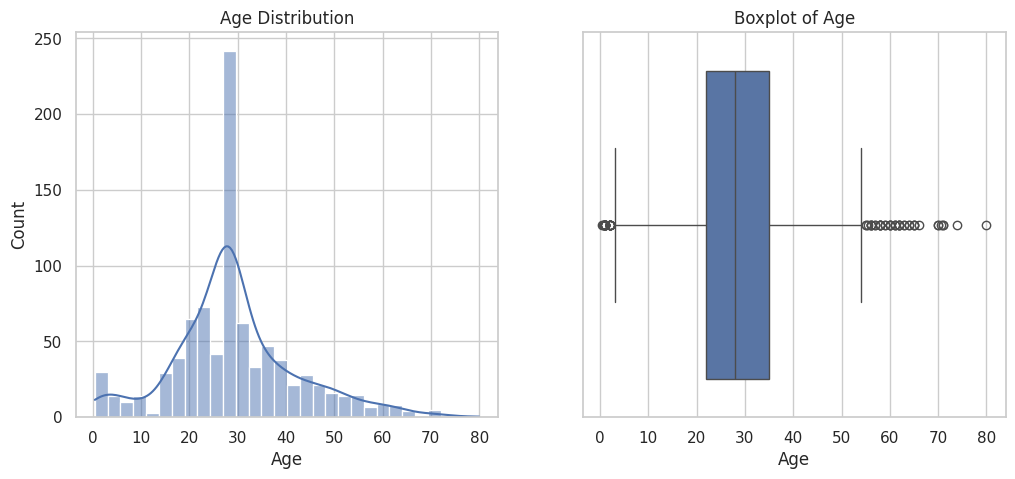

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Age')
plt.title('Boxplot of Age')
plt.show()

Most passengers are between 20 to 40 years old. The distribution is slightly right skewed, with fewer older passengers.

<Axes: xlabel='Survived', ylabel='Age'>

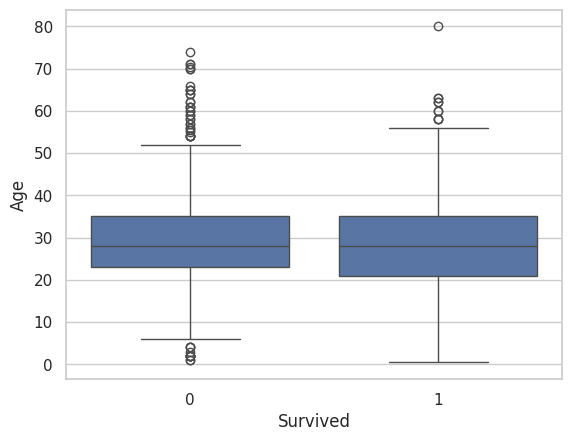

In [8]:
sns.boxplot(x='Survived', y='Age', data=df)

People of all ages didn’t survive, but those who did survive were mostly younger. It looks like younger passengers had a slightly better chance of survival.

<Axes: xlabel='Survived', ylabel='count'>

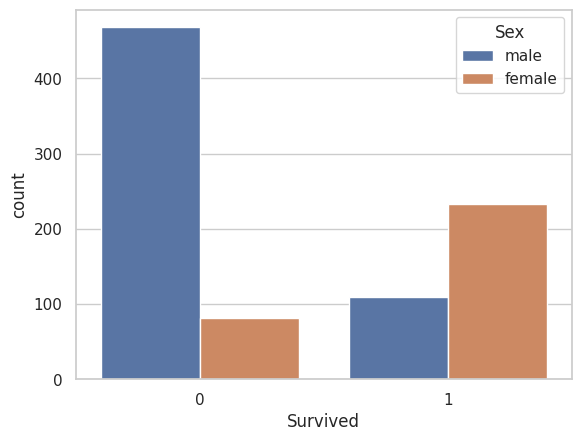

In [9]:
sns.countplot(x='Survived', hue='Sex', data=df)

More women survived than men. It looks like women were given priority during the rescue, while most of the men didn't make it.

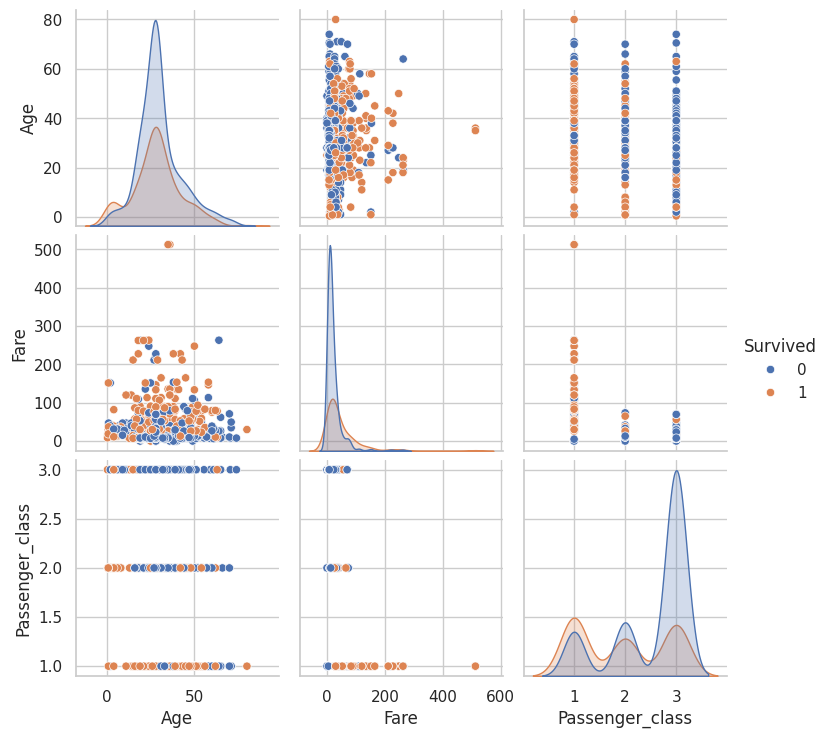

In [12]:
sns.pairplot(df[['Age', 'Fare', 'Passenger_class', 'Survived']], hue='Survived')

Passengers who paid lower fares and were in 3rd class mostly didn't survive. It looks like people in higher classes had better chances of survival.

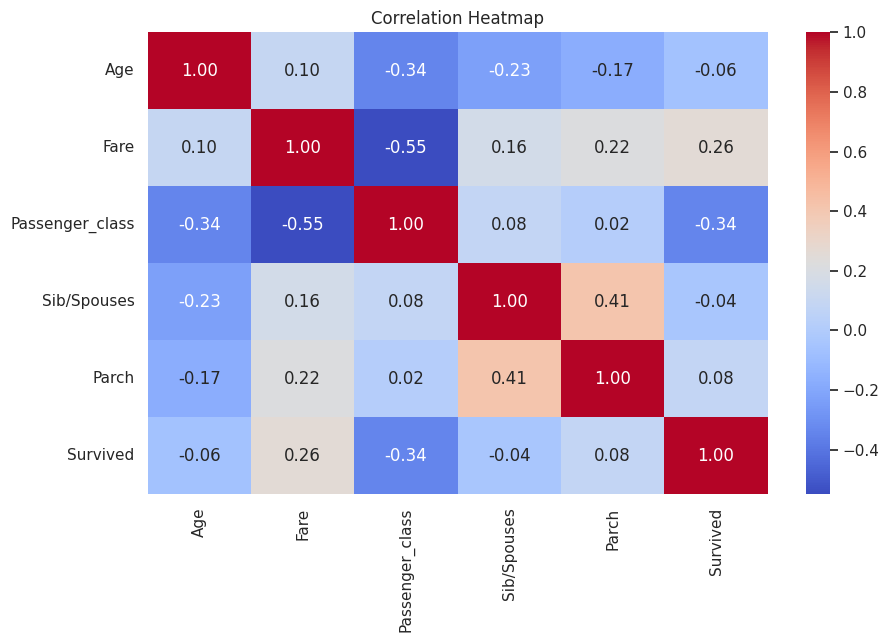

In [14]:
numeric_df = df[['Age', 'Fare', 'Passenger_class', 'Sib/Spouses', 'Parch', 'Survived']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

-Survival is positively correlated with fare and negatively with Passenger_class

-Survival is positively correlated with Fare and negatively with Passenger_class

-Fare and class have a clear relationship (higher class = higher fare)






SUMMARY OF INSIGHTS

- Most passengers were male and belonged to the 3rd class.
- Women had a higher survival rate compared to men.
- People in 1st class had a better chance of surviving than those in 2nd or 3rd class.
- Survivors were generally younger than non-survivors.
- Higher fare amounts were related to better survival chances.
- Passenger class and fare were strongly related (higher class to higher fare).
- The heatmap showed weak to moderate correlations between features like class, fare, and survival.